# Gradient optimization examples

This code illustrates two ideas of multi-variable optimization: quadratic forms and gradient descent.

In [2]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Quadratic forms

The easiest one-variable function to optimize is the quadratic, which can be written as $f(x) = 0.5ax^2-bx$ (I use this form without the constant term because it does not change the location of the optimum and add the extra 0.5 and negative sign for ease of optimization). In basic calculus we learn that we can find the optimum by taking the derivative of the function and setting it to zero: $f'(x) = ax- b = 0$, with the optimal value is $x = b/a$. Whether it is a maximum or minimum depends on whether the parabola is concave up or concave down, which is determined by the sign of $a$.

For functions of multiple variables, an equivalent quadratic function can be defined using vectors and matrices. Suppose the function $f(\vec x)$, with an n-dimensional vector $\vec x = (x_1, ..., x_n)$ is comprised of only linear and quadratic terms, e.g. $ax_i$ and $bx_i^2$ or $cx_ix_j$ (with a, b, c constants). Then it can be written using the *quadratic form*:

$$
f(\vec x) = 0.5\vec x ^T \times A \times \vec x -  \vec x^T \times \vec b
$$

The vectors $\vec x$  and $\vec b$ are n by 1 (column) vectors, with $\vec x^T$ indicating transpose (thus a row vector) and $A$ is an n by n matrix. The result of the multiplication in both terms is a scalar. 

Let us give an example for a two-variable function $f(x_1, x_2)$:

$$
f(x_1, x_2) = 0.5\begin{pmatrix} x_1 & x_2 \end{pmatrix}  \times \begin{pmatrix} 3 & -4 \\ -4 & -2  \end{pmatrix} \times \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}-  \begin{pmatrix} x_1 & x_2 \end{pmatrix}\times \begin{pmatrix} 7 \\ -1  \end{pmatrix}
$$
Multiplying it all out we get the following scalar quadratic function:


$$
f(x_1, x_2) = 1.5x_1^2 - 4 x_1x_2 - x_2^2 - 7x_1 + x_2
$$


As all quadratic functions have a single optimal combination of values of $(x_1, x_2)$, which can be found by using the same trick we used for the single-variable function: find the zero of the derivative (in this case gradient):

$$
\nabla f(\vec x) = A \times \vec x - \vec b = 0
$$

which happens to be (as long as $A$ is invertible):

$$
\vec x = A^{-1} \times \vec b
$$

For the specific function above, we can do this calculation in python:


In [31]:
A = np.array([[3, -4],[ -4 , 2]]) # the quadratic (Hessian) matrix
b = np.array([7,-1]) # the linear vector term
print("Optimal solution:", np.linalg.inv(A)@b)
print("Optimal solution:", np.linalg.solve(A,b))

Optimal solution: [-1.  -2.5]
Optimal solution: [-1.  -2.5]


## Examples of contour plots

Two different functions defined by quadratic forms are plotted below using plt.contourf() function. The plots show ellipsoidal contours characteristic of quadratic forms that surround the optimal value.

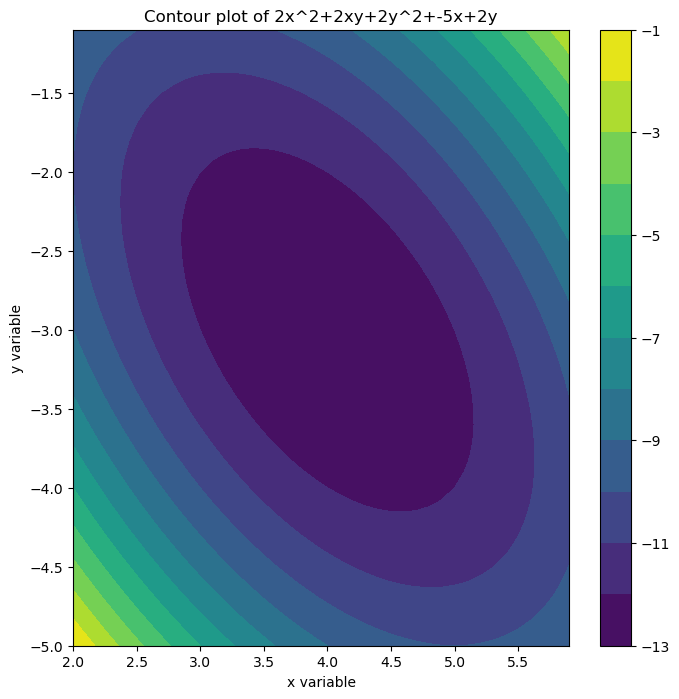

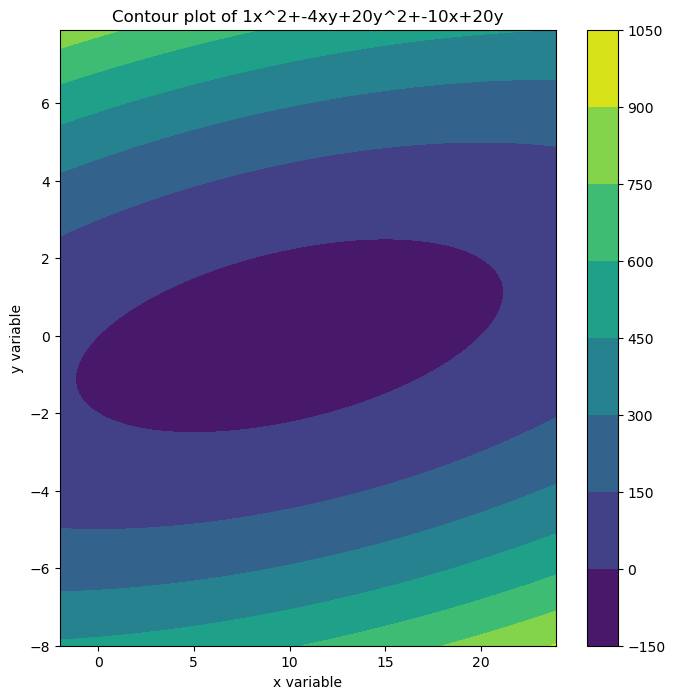

In [3]:
# First quadratic form
A1 = np.array([[2, 1],[ 1, 2 ]]) # the quadratic (Hessian) matrix
b1=np.array([5, -2]) # the linear vector term

dx = 0.1
x1 = np.arange(2.0, 6.0, dx)
x2 = np.arange(-5.0, -1.0, dx)
X1 ,X2 = np.meshgrid(x1, x2)
Z = 0.5*A1[0,0]*X1**2 + A1[0,1]*X1*X2 + 0.5*A1[1,1]*X2**2 -b1[0]*X1 - b1[1]*X2
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(X1, X2, Z, levels = 12)
fig.colorbar(cf, ax=ax)
ax.set_xlabel('x variable')
ax.set_ylabel('y variable')
ax.set_title('Contour plot of '+str(A1[0,0])+"x^2+"+str(A1[1,0]+A1[0,1])+"xy+"+str(A1[1,1])+
             "y^2+"+str(-b1[0])+"x+"+str(-b1[1])+"y")
plt.show()

# Second quadratic form
A2 = np.array([[1, -2],[ -2, 20]])  # the quadratic (Hessian) matrix
b2 = np.array([10, -20])  # the linear vector term

dx = 0.1
x1 = np.arange(-2.0, 24.0, dx)
x2 = np.arange(-8.0, 8.0, dx)
X1 ,X2 = np.meshgrid(x1, x2)
Z = 0.5*A2[0,0]*X1**2 + A2[0,1]*X1*X2 + 0.5*A2[1,1]*X2**2 -b2[0]*X1 - b2[1]*X2
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(X1, X2, Z)
fig.colorbar(cf, ax=ax)
ax.set_xlabel('x variable')
ax.set_ylabel('y variable')
ax.set_title('Contour plot of '+str(A2[0,0])+"x^2+"+str(A2[1,0]+A2[0,1])+"xy+"+str(A2[1,1])+
             "y^2+"+str(-b2[0])+"x+"+str(-b2[1])+"y")
plt.show()

## Gradient descent for linear regression

The gradient descent method can be used to mimize the sum of squared errors to calculate the coefficients of linear regression in the model 
$ y = ax + b$. The objective function is:
 
$$
f(a,b) = \sum_i (ax_i + b - y_i)^2
$$

The gradient of the  objecvtive function with respect to the two variables of the optimization is an array with two elements:

$$ 
G[0] = \frac{\partial f(a,b)}{\partial a} = \sum_i  2(ax_i + b - y_i)x_i
$$ 

$$ G[1] = \frac{\partial f(a,b)}{\partial b} = \sum_i  2(ax_i + b - y_i)
$$ 



Here is a basic implementation of gradient descent for finding the optimal slope and intercept for the generated random data set with slope 0.4 and intercept -10. The function takes the vectors of explanatory and response data, the initial guess, the learning rate, the tolerance, and the maximum number of interations, and returns the optimal parameters and the number of iterations it took to converge.

In [5]:
def obj_fun (x, y, parms): # objective function for linear regression
    a = parms[0]
    b = parms[1]
    return np.sum(a*x + b - y)**2

def grad_fun (x, y, parms): # gradient for linear regression
    a = parms[0]
    b = parms[1]
    return np.array([2*np.sum((a*x+b -y)*x),2*np.sum(a*x+b -y)])

def grad_lin_reg(x, y, guess, rate, tol, max_iter):
    count = 0 # initial count
    diff = 1.0e10 # initial difference
    while count<max_iter and diff>tol:
        best = guess - rate*grad_fun(x,y,guess)
        diff = np.abs(obj_fun(x,y,guess) - obj_fun(x,y,best))
        guess = best
        count = count+1
    return best, count

a = 0.4 # slope
b = -10 # intercept
w = 3 # noise strength
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # random x values between 0 and 10
y = a * x + b + w*rng.randn(50) # linear model plus random normal noise

guess = np.array([0,0])

rate = 0.0005 # learning rate
best, count = grad_lin_reg(x,y, guess, rate, 1e-5, 10000)
print("Best slope and intercept:", best, "number of iterations:", count)

Best slope and intercept: [ 0.48143882 -9.99449252] number of iterations: 609


### Gradient descent with momentum

Gradient descent performance can be improved with a hack, by adding a degree of momentum to the changes of the solution. This may be implemented by calculating the change of the solution variable as starting with the same change as before, multiplied by the momentum parameter, as shown below. Notice that with judicious choice of the learning rate and momentum, the method can converge much faster:

In [6]:
def grad_lin_reg2(x, y, guess, rate, mom, tol, max_iter): 
    # gradient descent with momentum
    count = 0 # initial count
    diff = 1.0e10 # initial difference
    change = np.zeros(guess.shape) # zero array of the shape of the parameters
    parm_hist = guess # initialize the history
    while count<max_iter and diff>tol: 
        change =  mom*change - rate*grad_fun(x,y,guess) # the change vector
        new = guess + change # calculate the new variable vector
        guess = new # replace current variables with new
        parm_hist = np.vstack((parm_hist, new))
        count = count+1
        diff = np.abs(obj_fun(x,y,parm_hist[-1]) - obj_fun(x,y,parm_hist[-2])) # change in objective function
       # print(diff)
    return parm_hist, count



a = 0.4 # slope
b = -10 # intercept
w = 3 # noise strength
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # random x values between 0 and 10
y = a * x + b + w*rng.randn(50) # linear model plus random normal noise

guess = np.array([0,0])

rate = 0.0005 # learning rate
mom = 0.5 # momentum
best, count = grad_lin_reg2(x,y, guess, rate, mom, 1e-5, 10000)
print(best[-1], count)


[ 0.48149749 -9.99487989] 306


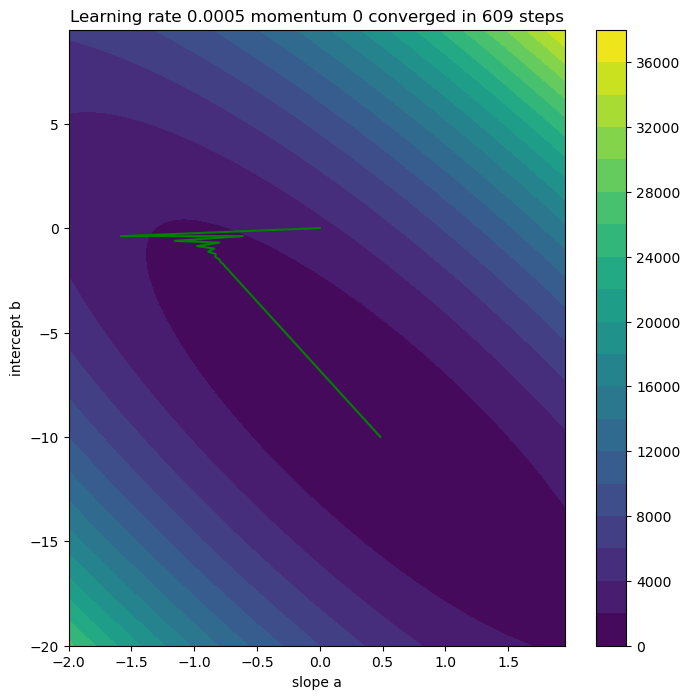

In [7]:
def obj_fun2(x,y,parms):
    # function to calculate the objective function of linear regression
    # x, y - 1-dimensional arrays of data values
    # parms - array of shape (2, n) of many parameter values
    X = np.vstack((x,np.ones(x.shape))) # matrix with x data and column of 1s
    y_pred = X.T @ parms # calculate predicted values
    y = y.reshape(len(y),1) 
    mse = np.sum((y_pred-y)**2,axis = 0)
    return mse


a = 0.4 # slope
b = -10 # intercept
w = 3 # noise strength
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # random x values between 0 and 10
y = a * x + b + w*rng.randn(50) # linear model plus random normal noise


a = np.arange(-2.0, 2.0, 0.05) # range of slope values
b = np.arange(-20.0, 10.0, 0.5) # range of intercept values
A, B = np.meshgrid(a, b)

parms = np.vstack((A.flatten(),B.flatten())) # gather parameters in an array of shape (n,2)
Z = obj_fun2(x,y,parms) # calculate the ojective function for all parameter values
Z = Z.reshape(A.shape) # put them pack into the same shape as the grid

#  Make contour plot of objective (SSE) function
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(A,B,Z, levels = 20) 
fig.colorbar(cf, ax=ax)


# Run gradient descent
guess = np.array([0,0])
rate = 0.0005
mom = 0
best, count = grad_lin_reg2(x,y, guess, rate, mom, 1e-5, 10000)
# plot gradient descent progress in parameter space
besta = best[:,0]
bestb = best[:,1]
plt.plot(besta, bestb, '-g')
ax.set_xlabel('slope a')
ax.set_ylabel('intercept b')
ax.set_title('Learning rate '+str(rate)+
             " momentum "+str(mom)+" converged in "+str(count)+" steps")
plt.show()

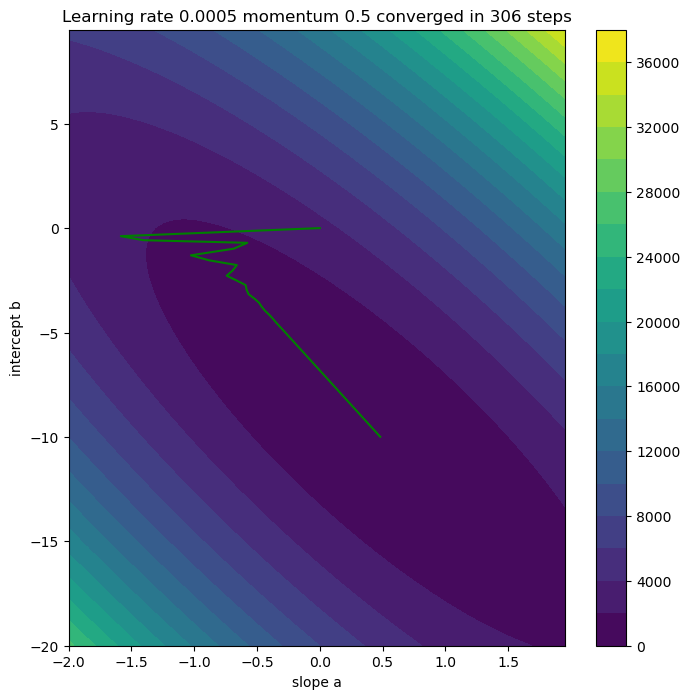

In [8]:
a = 0.4 # slope
b = -10 # intercept
w = 3 # noise strength
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # random x values between 0 and 10
y = a * x + b + w*rng.randn(50) # linear model plus random normal noise


a = np.arange(-2.0, 2.0, 0.05) # range of slope values
b = np.arange(-20.0, 10.0, 0.5) # range of intercept values
A, B = np.meshgrid(a, b)

parms = np.vstack((A.flatten(),B.flatten())) # gather parameters in an array of shape (n,2)
Z = obj_fun2(x,y,parms) # calculate the ojective function for all parameter values
Z = Z.reshape(A.shape) # put them pack into the same shape as the grid

#  Make contour plot of objective (SSE) function
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(A,B,Z, levels = 20) 
fig.colorbar(cf, ax=ax)


# Run gradient descent
guess = np.array([0,0])
rate = 0.0005
mom = 0.5
best, count = grad_lin_reg2(x,y, guess, rate, mom, 1e-5, 10000)
# plot gradient descent progress in parameter space
besta = best[:,0]
bestb = best[:,1]
plt.plot(besta, bestb, '-g')
ax.set_xlabel('slope a')
ax.set_ylabel('intercept b')
ax.set_title('Learning rate '+str(rate)+
             " momentum "+str(mom)+" converged in "+str(count)+" steps")
plt.show()

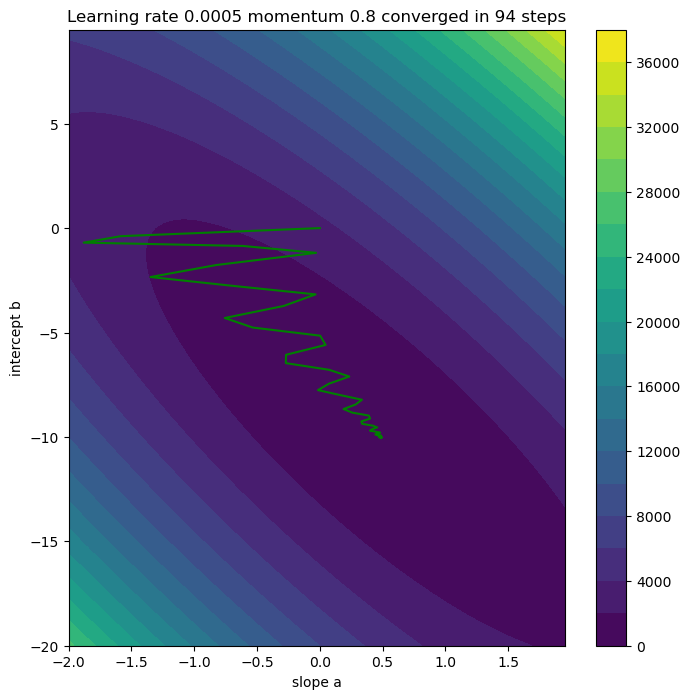

In [9]:
a = 0.4 # slope
b = -10 # intercept
w = 3 # noise strength
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) # random x values between 0 and 10
y = a * x + b + w*rng.randn(50) # linear model plus random normal noise


a = np.arange(-2.0, 2.0, 0.05) # range of slope values
b = np.arange(-20.0, 10.0, 0.5) # range of intercept values
A, B = np.meshgrid(a, b)

parms = np.vstack((A.flatten(),B.flatten())) # gather parameters in an array of shape (n,2)
Z = obj_fun2(x,y,parms) # calculate the ojective function for all parameter values
Z = Z.reshape(A.shape) # put them pack into the same shape as the grid

#  Make contour plot of objective (SSE) function
fig, ax = plt.subplots(figsize=(8,8))
cf = ax.contourf(A,B,Z, levels = 20) 
fig.colorbar(cf, ax=ax)


# Run gradient descent
guess = np.array([0,0])
rate = 0.0005
mom = 0.8
best, count = grad_lin_reg2(x,y, guess, rate, mom, 1e-5, 10000)
# plot gradient descent progress in parameter space
besta = best[:,0]
bestb = best[:,1]
plt.plot(besta, bestb, '-g')
ax.set_xlabel('slope a')
ax.set_ylabel('intercept b')
ax.set_title('Learning rate '+str(rate)+
             " momentum "+str(mom)+" converged in "+str(count)+" steps")
plt.show()